<a href="https://colab.research.google.com/github/jieryin/Code-portfolio/blob/main/Coding_Supplement_Jier_Yin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Supplement - Jier Yin
https://github.com/jieryin/Code-portfolio

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# MNIST dataset
(X, y_int), _ = mnist.load_data()
X = X.reshape(X.shape[0],-1)
y_one_hot = to_categorical(y_int, num_classes=10)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Create a model that underfits the data after at least 50 epochs.
def q2():
  model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=(X_train.shape[1],))
    ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
  return model

In [ ]:
batch_size_q2 = 32
epochs_q2 = 50
model_q2 = q2()
history_q2 = model_q2.fit(X_train,y_train, epochs=epochs_q2, batch_size=batch_size_q2, validation_data=(X_valid, y_valid))


Epoch 1/50
1050/1050 [==============================] - 3s 3ms/step - loss: 8.1206 - categorical_crossentropy: 8.1206 - val_loss: 7.8927 - val_categorical_crossentropy: 7.8927
Epoch 2/50
1050/1050 [==============================] - 2s 2ms/step - loss: 8.5724 - categorical_crossentropy: 8.5724 - val_loss: 9.1285 - val_categorical_crossentropy: 9.1285
Epoch 3/50
1050/1050 [==============================] - 3s 3ms/step - loss: 8.6265 - categorical_crossentropy: 8.6265 - val_loss: 8.3438 - val_categorical_crossentropy: 8.3438
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 8.5528 - categorical_crossentropy: 8.5528 - val_loss: 9.6253 - val_categorical_crossentropy: 9.6253
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 8.5054 - categorical_crossentropy: 8.5054 - val_loss: 9.0376 - val_categorical_crossentropy: 9.0376
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 8.7029 - categorical_crossentropy: 8.7029 - 

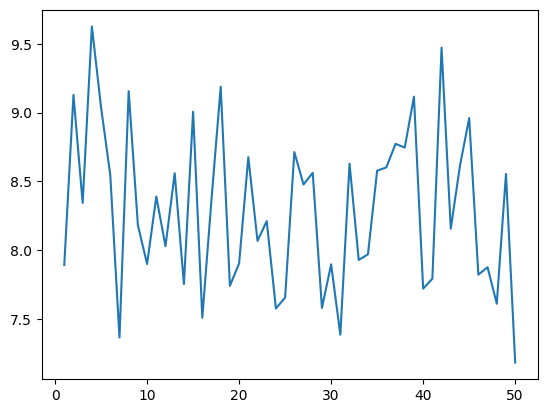

In [ ]:
val_loss = history_q2.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

In [ ]:
# create a model that overfits
def q3():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
  return model

In [ ]:
batch_size_q3 = 32
epochs_q3 = 50
model_q3 = q3()
history_q3 = model_q3.fit(X_train,y_train, epochs=epochs_q3,
                          batch_size=batch_size_q3, validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5639 - categorical_crossentropy: 0.5639 - val_loss: 0.3599 - val_categorical_crossentropy: 0.3599
Epoch 2/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3245 - categorical_crossentropy: 0.3245 - val_loss: 0.3221 - val_categorical_crossentropy: 0.3221
Epoch 3/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2925 - categorical_crossentropy: 0.2925 - val_loss: 0.3184 - val_categorical_crossentropy: 0.3184
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2753 - categorical_crossentropy: 0.2753 - val_loss: 0.3068 - val_categorical_crossentropy: 0.3068
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2624 - categorical_crossentropy: 0.2624 - val_loss: 0.3079 - val_categorical_crossentropy: 0.3079
Epoch 6/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2562 - categorical_crossentropy: 0.2562 - 

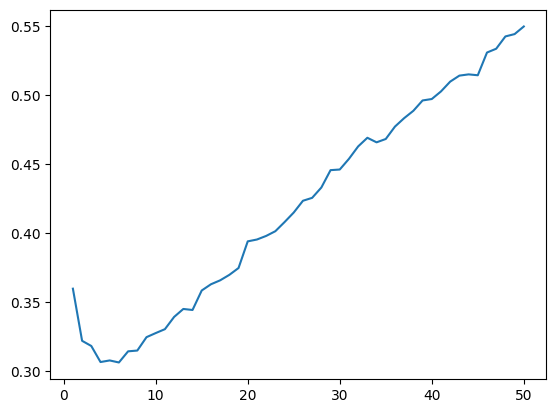

In [ ]:
val_loss = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

I think the best stopping point is somewhere near the 5th epoch, as the validation loss is the lowest there. The point where the validation loss stops decreasing and starts to increase is typically the best stopping point, as the model learns the data well, and after that point the model starts to overfit.

In [ ]:
# use keras early stopping
model_q4 = q3()
es = EarlyStopping(
    monitor='val_categorical_crossentropy',
    restore_best_weights=True
)
history_q4 = model_q4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[es]
)

Epoch 1/50
1050/1050 [==============================] - 5s 3ms/step - loss: 0.6132 - categorical_crossentropy: 0.6132 - val_loss: 0.3899 - val_categorical_crossentropy: 0.3899
Epoch 2/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3347 - categorical_crossentropy: 0.3347 - val_loss: 0.3493 - val_categorical_crossentropy: 0.3493
Epoch 3/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3032 - categorical_crossentropy: 0.3032 - val_loss: 0.3376 - val_categorical_crossentropy: 0.3376
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2856 - categorical_crossentropy: 0.2856 - val_loss: 0.3228 - val_categorical_crossentropy: 0.3228
Epoch 5/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2714 - categorical_crossentropy: 0.2714 - val_loss: 0.3263 - val_categorical_crossentropy: 0.3263


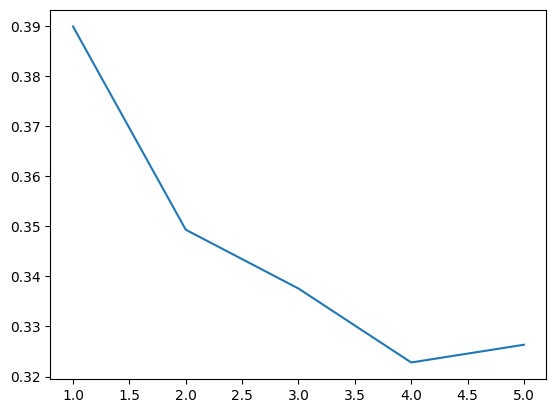

In [ ]:
val_loss = history_q4.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

I first tried reducing the first layer's neurons from 10 to 6. This simplifies the model and helps in regularizing it. I also added an exponential decay schedule for the learning rate. This adaptive approach helps in avoiding overfitting by fine-tuning the learning rate during training. Now we successfully prevented overfitting but there is a problem of underfitting. So I tuned the 1st layer neuron to be 7 and decreased the decay rate of learning rate from 0.9 to 0.4. The balance struck here aims to retain the model's ability to learn patterns in the data while reducing the risk overfitting.



In [ ]:
# regularize by reducing size of network
def q5():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(7, activation='relu', input_shape=(X_train.shape[1],)),  # Reduced neurons
      tf.keras.layers.Dense(10, activation='softmax')
  ])
     # Adding a learning rate schedule for better convergence
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.4)

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
    return model

In [ ]:
batch_size_q5 = 32
epochs_q5 = 50
model_q5 = q5()
history_q5 = model_q5.fit(X_train,y_train, epochs=epochs_q5, batch_size=batch_size_q5, validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 [==============================] - 5s 4ms/step - loss: 0.7060 - categorical_crossentropy: 0.7060 - val_loss: 0.4501 - val_categorical_crossentropy: 0.4501
Epoch 2/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4098 - categorical_crossentropy: 0.4098 - val_loss: 0.4123 - val_categorical_crossentropy: 0.4123
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3775 - categorical_crossentropy: 0.3775 - val_loss: 0.3980 - val_categorical_crossentropy: 0.3980
Epoch 4/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3619 - categorical_crossentropy: 0.3619 - val_loss: 0.3911 - val_categorical_crossentropy: 0.3911
Epoch 5/50
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3514 - categorical_crossentropy: 0.3514 - val_loss: 0.3869 - val_categorical_crossentropy: 0.3869
Epoch 6/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3442 - categorical_crossentropy: 0.3442 - 

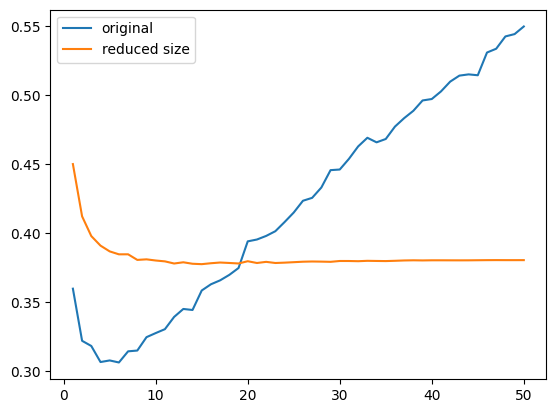

In [ ]:
val_loss_q5 = history_q5.history["val_categorical_crossentropy"]
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
plt.plot(np.arange(1,len(val_loss_q5)+1),val_loss_q5, label="reduced size")
plt.legend()

I started with l1_value=0.01.The model started to underfit, and it might be a sign that the regularization is too strong.So now I set the l1_value to be 0.001, and the regularized model has a better performance.

In [ ]:
# regularize by L1 regularization
def q6(l1_value=0.001):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(l1_value)),
      tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=l1(l1_value))
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
  return model

In [ ]:
batch_size_q6 = 32
epochs_q6 = 50
model_q6 = q6()
history_q6 = model_q6.fit(X_train,y_train, epochs=epochs_q6, batch_size=batch_size_q6, validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 [==============================] - 7s 7ms/step - loss: 0.7907 - categorical_crossentropy: 0.5584 - val_loss: 0.5719 - val_categorical_crossentropy: 0.3708
Epoch 2/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5172 - categorical_crossentropy: 0.3287 - val_loss: 0.5148 - val_categorical_crossentropy: 0.3335
Epoch 3/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4762 - categorical_crossentropy: 0.3005 - val_loss: 0.4777 - val_categorical_crossentropy: 0.3062
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4545 - categorical_crossentropy: 0.2853 - val_loss: 0.4643 - val_categorical_crossentropy: 0.2981
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4425 - categorical_crossentropy: 0.2757 - val_loss: 0.4612 - val_categorical_crossentropy: 0.2970
Epoch 6/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4349 - categorical_crossentropy: 0.2704 - 

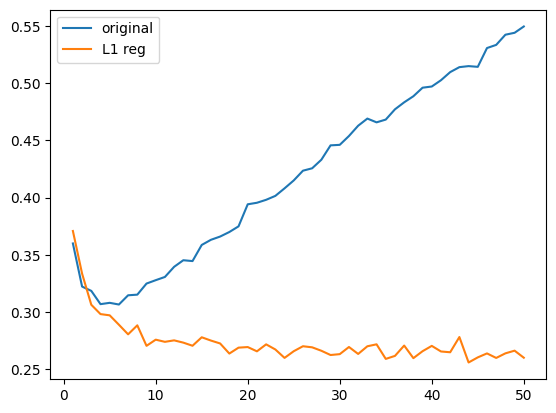

In [ ]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q6 = history_q6.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q6)+1),val_loss_q6, label="L1 reg")
plt.legend()

I first set the l2_value to be 0.01, and the model seemed to underfit, which means that the regularization is too strong. So I set the l2_value to be 0.001, and now the model is not underfitting and we successfully prevented overfitting.

In [ ]:
# regularize by L2 regularization
def q7(l2_value=0.001):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_value)),
      tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=l2(l2_value))
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
  return model

In [ ]:
batch_size_q7 = 32
epochs_q7 = 50
model_q7 = q7()
history_q7 = model_q7.fit(X_train,y_train, epochs=epochs_q7, batch_size=batch_size_q7, validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.6106 - categorical_crossentropy: 0.5725 - val_loss: 0.3870 - val_categorical_crossentropy: 0.3438
Epoch 2/50
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3431 - categorical_crossentropy: 0.2982 - val_loss: 0.3500 - val_categorical_crossentropy: 0.3043
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3145 - categorical_crossentropy: 0.2673 - val_loss: 0.3399 - val_categorical_crossentropy: 0.2916
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3039 - categorical_crossentropy: 0.2549 - val_loss: 0.3356 - val_categorical_crossentropy: 0.2861
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2957 - categorical_crossentropy: 0.2450 - val_loss: 0.3353 - val_categorical_crossentropy: 0.2840
Epoch 6/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2932 - categorical_crossentropy: 0.2414 - 

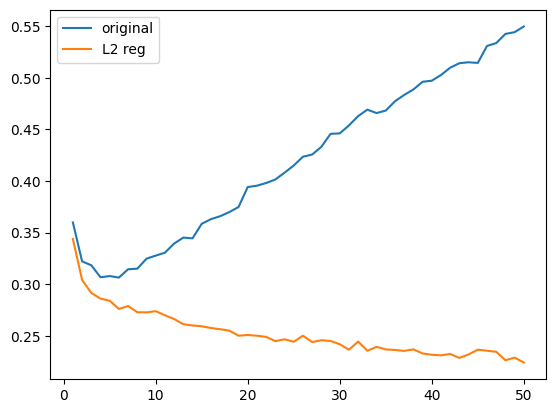

In [ ]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q7 = history_q7.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q7)+1),val_loss_q7, label="L2 reg")
plt.legend()

I first added a dropout layer after the 1st layer and set the dropout rate to be 0.5. After checking the output plot, I found that the model is still overfitting so I changed the dropout rate to be 0.2 and set a smaller learning rate. Now we prevented overfitting successfully.

In [ ]:
# regularize by using dropout
def q8():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
    return model

In [ ]:
batch_size_q8 = 32
epochs_q8 = 50
model_q8 = q8()
history_q8 = model_q8.fit(X_train,y_train, epochs=epochs_q8, batch_size=batch_size_q8, validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 [==============================] - 6s 5ms/step - loss: 1.6777 - categorical_crossentropy: 1.6777 - val_loss: 1.1384 - val_categorical_crossentropy: 1.1384
Epoch 2/50
1050/1050 [==============================] - 3s 3ms/step - loss: 1.1027 - categorical_crossentropy: 1.1027 - val_loss: 0.7735 - val_categorical_crossentropy: 0.7735
Epoch 3/50
1050/1050 [==============================] - 5s 5ms/step - loss: 0.9033 - categorical_crossentropy: 0.9033 - val_loss: 0.6191 - val_categorical_crossentropy: 0.6191
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.8073 - categorical_crossentropy: 0.8073 - val_loss: 0.5459 - val_categorical_crossentropy: 0.5459
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.7597 - categorical_crossentropy: 0.7597 - val_loss: 0.5089 - val_categorical_crossentropy: 0.5089
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.7219 - categorical_crossentropy: 0.7219 - 

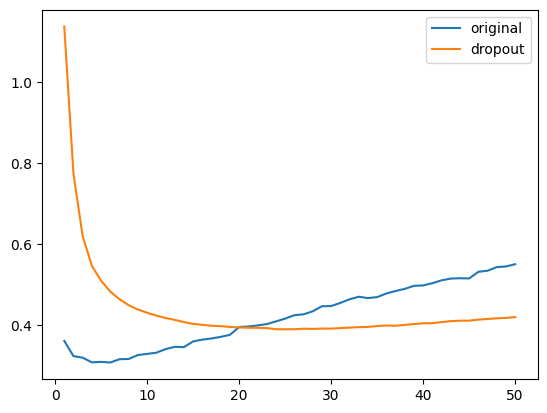

In [ ]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q8 = history_q8.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q8)+1),val_loss_q8, label="dropout")
plt.legend()

By checking the above methods, I found L1 and L2 regularization most suitable for this dataset, leading to a model that learns the data well and does not overfit. So I used a combination of the L1 and L2 regularization, with the l1 and l2 value the same as tuned before, 0.001

In [ ]:
# regularize it by using a combination of the methods used
def q9(l1_value=0.001, l2_value=0.001):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],),
                          kernel_regularizer=l2(l2_value)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=l1(l1_value))
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["categorical_crossentropy"])
  return model


In [ ]:
batch_size_q9 = 32
epochs_q9 = 50
model_q9 = q9()
history_q9 = model_q9.fit(X_train,y_train, epochs=epochs_q9, batch_size=batch_size_q9, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.6410 - categorical_crossentropy: 0.5837 - val_loss: 0.4265 - val_categorical_crossentropy: 0.3645
Epoch 2/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3780 - categorical_crossentropy: 0.3143 - val_loss: 0.3803 - val_categorical_crossentropy: 0.3159
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3449 - categorical_crossentropy: 0.2792 - val_loss: 0.3566 - val_categorical_crossentropy: 0.2904
Epoch 4/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3275 - categorical_crossentropy: 0.2604 - val_loss: 0.3470 - val_categorical_crossentropy: 0.2791
Epoch 5/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3169 - categorical_crossentropy: 0.2485 - val_loss: 0.3422 - val_categorical_crossentropy: 0.2735
Epoch 6/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3093 - categorical_crossentropy: 0.2399 - 

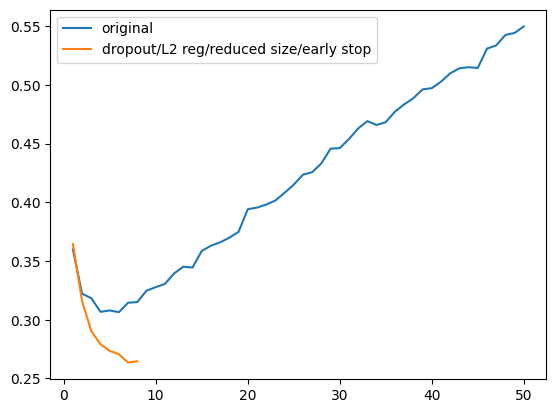

In [ ]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q9 = history_q9.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q9)+1),val_loss_q9, label="dropout/L2 reg/reduced size/early stop")
plt.legend()

In [ ]:
# take the models and find test loss
loss_q2, metric_q2 = model_q2.evaluate(X_test, y_test)
loss_q3, metric_q3 = model_q3.evaluate(X_test, y_test)
loss_q4, metric_q4 = model_q4.evaluate(X_test, y_test)
loss_q5, metric_q5 = model_q5.evaluate(X_test, y_test)
loss_q6, metric_q6 = model_q6.evaluate(X_test, y_test)
loss_q7, metric_q7 = model_q7.evaluate(X_test, y_test)
loss_q8, metric_q8 = model_q8.evaluate(X_test, y_test)
loss_q9, metric_q9 = model_q9.evaluate(X_test, y_test)

print("Test loss for model_q2:", loss_q2)
print("Test loss for model_q3:", loss_q3)
print("Test loss for model_q4:", loss_q4)
print("Test loss for model_q5:", loss_q5)
print("Test loss for model_q6:", loss_q6)
print("Test loss for model_q7:", loss_q7)
print("Test loss for model_q8:", loss_q8)
print("Test loss for model_q9:", loss_q9)

563/563 [==============================] - 1s 2ms/step - loss: 0.3215 - categorical_crossentropy: 0.2505
Test loss for model_q2: 7.371807098388672
Test loss for model_q3: 0.5524060130119324
Test loss for model_q4: 0.31069067120552063
Test loss for model_q5: 0.3758372664451599
Test loss for model_q6: 0.4283527433872223
Test loss for model_q7: 0.2931092083454132
Test loss for model_q8: 0.40416863560676575
Test loss for model_q9: 0.32146620750427246


I choose model 7.
Choosing the best model among the ones from questions 2 to 9 depends on a balance of factors such as test loss, the complexity of the model, its generalization capability. The model 7 has the lowest test lost. Generally, a lower loss indicates better performance of the model in terms of how well it's predicting or fitting the data according to the loss function used. By checking its plot, we found that it does not overfit and learns the dataset pretty well. Also, the test loss for model 7 is lower than the validation loss during training, it might be more reliable in terms of generalization.